<a href="https://colab.research.google.com/github/Mhaske1200/SHUBHAM_MHASKE_AIMLBootcamp_Genzeon_2023/blob/main/AIML_17_KIDNEY_DISEASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print("DAY 17")

DAY 17


In [67]:
dataset = '/content/drive/MyDrive/AI_ML/kidney_disease.csv'

import pandas as pd

df = pd.read_csv(dataset)

In [22]:
df

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    notpresent  ...   38  6000  NaN   no   no   no  good   no   no   
2    notpresent  ...   31  7500  NaN   no  yes   no  poor   no  yes   
3    notpresent  ...   32  6700  3.9  yes   no   no  poor  yes  yes   
4    notpresent  ...   35  7300  4.6   no   no   no  good   no   no   
..          ...  ...  ...   ...  ...  ...  ...  ...   ...  ...  ...   
395  notpresent  ...   47  6700  4.9   no   no   no  good   no   no   
396  notpresent  ...   54  7800  6.2   no   no   no  good   no   no   
397  notpresent  ...   49  6600  5.4   no   no   no  good   no   no   
398  notpresent  ...   51  7200  5.9   no   no   no  good   no   no   
399  notpresent  ...   53  6800  6.1   no   no   no  good   no   no   

    classification  
0              ckd  
1              ckd  
2              ckd  
3              ckd  
4              ckd  
..             ...  
395         notckd  
396         notckd  
397         notckd  
398         notckd  
399         notckd  

[400 rows x 26 columns]

In [68]:
print(df.isna().sum())

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


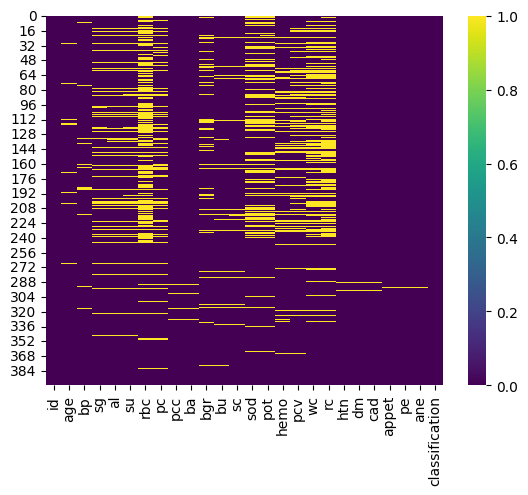

In [7]:
import seaborn as sb
import matplotlib.pyplot as plt

def get_heat_map(df):
  sb.heatmap(df.isnull() , cmap='viridis')
  return plt.show()

get_heat_map(df)

In [8]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [69]:
df = df.drop(columns='id')

In [10]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [11]:
# Selecting the numerical columns for correlation analysis
import seaborn as sns
numerical_columns = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification']
numerical_data = df[numerical_columns]

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Visualizing the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

<ipython-input-11-2c3f68618603>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numerical_data.corr()


<Axes: >

In [12]:
df.describe()

age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo  
count  381.000000  383.000000  313.000000  312.000000  348.000000  
mean    57.425722    3.072454  137.528754    4.627244   12.526437  
std     50.503006    5.741126   10.408752    3.193904    2.912587  
min      1.500000    0.400000    4.500000    2.500000    3.100000  
25%     27.000000    0.900000  135.000000    3.800000   10.300000  
50%     42.000000    1.300000  138.000000    4.400000   12.650000  
75%     66.000000    2.800000  142.000000    4.900000   15.000000  
max    391.000000   76.000000  163.000000   47.000000   17.800000

In [13]:
df.head()

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0  121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            ckd  
1    NaN  ...   38  6000  NaN   no   no  no  good   no   no            ckd  
2  423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            ckd  
3  117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes            ckd  
4  106.0  ...   35  7300  4.6   no   no  no  good   no   no            ckd  

[5 rows x 25 columns]

In [70]:
df = df.drop(columns='rbc')
df = df.drop(columns='pc')
df = df.drop(columns='pcc')
df = df.drop(columns='ba')
df = df.drop(columns='htn')
df = df.drop(columns='dm')
df = df.drop(columns='cad')
df = df.drop(columns='appet')
df = df.drop(columns='pe')
df = df.drop(columns='ane')

In [16]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'classification'],
      dtype='object')

In [17]:
import seaborn as sns
numerical_columns = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'classification']
numerical_data = df[numerical_columns]

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Visualizing the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

<ipython-input-17-19ae5b1d2c4a>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numerical_data.corr()


<Axes: >

In [18]:
df

age    bp     sg   al   su    bgr    bu   sc    sod  pot  hemo pcv  \
0    48.0  80.0  1.020  1.0  0.0  121.0  36.0  1.2    NaN  NaN  15.4  44   
1     7.0  50.0  1.020  4.0  0.0    NaN  18.0  0.8    NaN  NaN  11.3  38   
2    62.0  80.0  1.010  2.0  3.0  423.0  53.0  1.8    NaN  NaN   9.6  31   
3    48.0  70.0  1.005  4.0  0.0  117.0  56.0  3.8  111.0  2.5  11.2  32   
4    51.0  80.0  1.010  2.0  0.0  106.0  26.0  1.4    NaN  NaN  11.6  35   
..    ...   ...    ...  ...  ...    ...   ...  ...    ...  ...   ...  ..   
395  55.0  80.0  1.020  0.0  0.0  140.0  49.0  0.5  150.0  4.9  15.7  47   
396  42.0  70.0  1.025  0.0  0.0   75.0  31.0  1.2  141.0  3.5  16.5  54   
397  12.0  80.0  1.020  0.0  0.0  100.0  26.0  0.6  137.0  4.4  15.8  49   
398  17.0  60.0  1.025  0.0  0.0  114.0  50.0  1.0  135.0  4.9  14.2  51   
399  58.0  80.0  1.025  0.0  0.0  131.0  18.0  1.1  141.0  3.5  15.8  53   

       wc   rc classification  
0    7800  5.2            ckd  
1    6000  NaN            ckd  
2    7500  NaN            ckd  
3    6700  3.9            ckd  
4    7300  4.6            ckd  
..    ...  ...            ...  
395  6700  4.9         notckd  
396  7800  6.2         notckd  
397  6600  5.4         notckd  
398  7200  5.9         notckd  
399  6800  6.1         notckd  

[400 rows x 15 columns]

In [71]:
df['classification'].replace("ckd\t","ckd",inplace=True)

In [72]:
from sklearn.preprocessing import LabelEncoder

cll=df['classification']

label_encoder = LabelEncoder()
df['classification'] = label_encoder.fit_transform(cll)

print(df)

      age    bp     sg   al   su    bgr    bu   sc    sod  pot  hemo pcv  \
0    48.0  80.0  1.020  1.0  0.0  121.0  36.0  1.2    NaN  NaN  15.4  44   
1     7.0  50.0  1.020  4.0  0.0    NaN  18.0  0.8    NaN  NaN  11.3  38   
2    62.0  80.0  1.010  2.0  3.0  423.0  53.0  1.8    NaN  NaN   9.6  31   
3    48.0  70.0  1.005  4.0  0.0  117.0  56.0  3.8  111.0  2.5  11.2  32   
4    51.0  80.0  1.010  2.0  0.0  106.0  26.0  1.4    NaN  NaN  11.6  35   
..    ...   ...    ...  ...  ...    ...   ...  ...    ...  ...   ...  ..   
395  55.0  80.0  1.020  0.0  0.0  140.0  49.0  0.5  150.0  4.9  15.7  47   
396  42.0  70.0  1.025  0.0  0.0   75.0  31.0  1.2  141.0  3.5  16.5  54   
397  12.0  80.0  1.020  0.0  0.0  100.0  26.0  0.6  137.0  4.4  15.8  49   
398  17.0  60.0  1.025  0.0  0.0  114.0  50.0  1.0  135.0  4.9  14.2  51   
399  58.0  80.0  1.025  0.0  0.0  131.0  18.0  1.1  141.0  3.5  15.8  53   

       wc   rc  classification  
0    7800  5.2               0  
1    6000  NaN       

In [46]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'classification'],
      dtype='object')

In [73]:
print(df.isna().sum())

age                 9
bp                 12
sg                 47
al                 46
su                 49
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
classification      0
dtype: int64


In [74]:
import numpy as np
df['rc'].replace("\t?",np.nan, inplace=True)

df.wc.replace("\t?",np.nan, inplace=True)

df['pcv'].replace(["\t?","\t43"],np.nan, inplace=True)

In [75]:
CategoricalColumns=['pcv', 'wc', 'rc']
for columnName in CategoricalColumns:
  df[columnName].fillna(df[columnName].mode()[0], inplace=True)

In [76]:
NumericalColumns=['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']
for columnName in NumericalColumns:
  df[columnName].fillna(df[columnName].mean(), inplace=True)

In [77]:
print(df.isna().sum())

age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
classification    0
dtype: int64


In [78]:
x = df.drop(columns='classification')
y = df['classification']

In [79]:
from sklearn.model_selection import train_test_split
Xtrain , Xtest , Ytrain , Ytest = train_test_split(x,y , test_size=0.3 , random_state=23)


In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(Xtrain,Ytrain)

KNeighborsClassifier()

In [93]:
y_pred=knn_clf.predict(Xtest)

In [94]:
knn_clf.score(x,y)


0.79

In [90]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#for best k values
neighbors=np.arange(1,65)#array and initialize it with 1,20
overall_accuracy=np.empty(len(neighbors))
training_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn_clf=KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(Xtrain,Ytrain)

  training_accuracy[i]=knn_clf.score(Xtrain,Ytrain)

  test_accuracy[i]=knn_clf.score(Xtest,Ytest)


  #overall accuracy
  overall_accuracy[i]=knn_clf.score(x,y)

#Generate the graphs

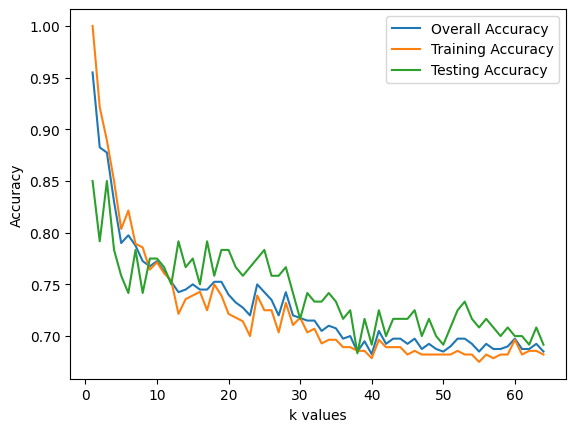

In [91]:
import matplotlib.pyplot as plt
plt.plot(neighbors,overall_accuracy,label="Overall Accuracy")
plt.plot(neighbors,training_accuracy,label="Training Accuracy")
plt.plot(neighbors,test_accuracy,label="Testing Accuracy")
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()